In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from pathlib import Path
from sklearn.model_selection import train_test_split
sns.set_style("whitegrid")

In [7]:
aggregate=pd.read_csv('./aggregate.csv',engine='python')
aggregate.set_index('GEO_ID',inplace=True)

In [8]:
results=['democrat','republican']
y=aggregate.loc[:,results]
x=aggregate.drop(axis=1,labels=results)

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,shuffle=True,random_state=121)

In [48]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2492 entries, 0500000US30027 to 0500000US13221
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   NAME            2492 non-null   object 
 1   total_pop       2492 non-null   int64  
 2   pop_18_30_pc    2492 non-null   float64
 3   pop_60_up_pc    2492 non-null   float64
 4   pop_male_pc     2492 non-null   float64
 5   afr_amer_pc     2492 non-null   float64
 6   amer_ind_pc     2492 non-null   float64
 7   asian_pc        2492 non-null   float64
 8   latino_pc       2492 non-null   float64
 9   white_pc        2492 non-null   float64
 10  afr_amer_delta  2492 non-null   float64
 11  amer_ind_delta  2492 non-null   float64
 12  asian_delta     2492 non-null   float64
 13  latino_delta    2492 non-null   float64
 14  white_delta     2492 non-null   float64
 15  pov_pc          2492 non-null   float64
 16  pov_pc_delta    2492 non-null   float64
 17  unemp_rate     

In [52]:
y_train['diff']=y_train['democrat']

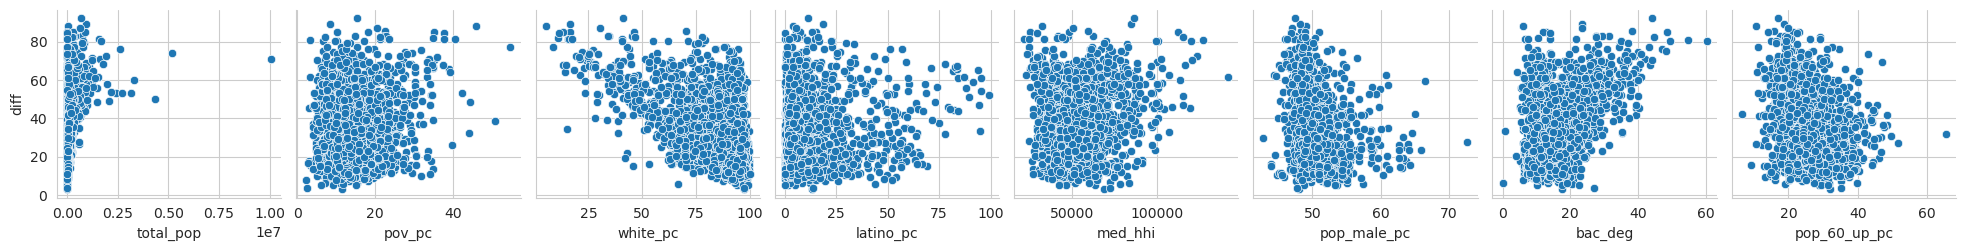

In [54]:
sns.pairplot(data=pd.concat([x_train,y_train]),x_vars=['total_pop','pov_pc','white_pc','latino_pc', 'med_hhi', 'pop_male_pc', 'bac_deg','pop_60_up_pc'],y_vars=['diff'])

plt.show()